# Robot Ensemble Prediction

## Setup

Initialize packages and helper functions

In [64]:

# Helper libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sci-kit learn libraries
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Load helper_functions.py
%run helper_functions.py

## Data Exploration

Load in data and analyze its composition

In [55]:
x_test = pd.read_csv('X_test.csv')
x_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
submission = pd.read_csv('sample_submission.csv')
print('Train X: {}\nTrain Y: {}\nTest X: {}\nSubmission: {}'.format(x_train.shape,y_train.shape,x_test.shape,submission.shape))

Train X: (487680, 13)
Train Y: (3810, 3)
Test X: (488448, 13)
Submission: (3816, 2)


In [11]:
x_train.head()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.025773,-0.98864,-0.14801,0.003350,-0.006524,-0.001071,-0.027390,0.10043,4.2061,-5.5439
1,0_1,0,1,-0.025683,-0.98862,-0.14816,0.003439,-0.113960,0.083987,-0.060590,-0.70889,3.9905,-8.0273
2,0_2,0,2,-0.025617,-0.98861,-0.14826,0.003571,-0.080518,0.114860,-0.037177,1.45710,2.2828,-11.2990
3,0_3,0,3,-0.025566,-0.98862,-0.14817,0.003609,0.070067,0.033820,-0.035904,0.71096,1.8582,-12.2270
4,0_4,0,4,-0.025548,-0.98866,-0.14792,0.003477,0.152050,-0.029016,-0.015314,3.39960,2.7881,-10.4100


In [26]:
x_train.describe()

,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
count,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000
mean,1904.500000,63.500000,-0.018050,0.075062,0.012458,-0.003804,0.000178,0.008338,-0.019184,0.129281,2.886468,-9.364886
std,1099.853353,36.949327,0.685696,0.708226,0.105972,0.104299,0.117764,0.088677,0.229153,1.870600,2.140067,2.845341
min,0.000000,0.000000,-0.989100,-0.989650,-0.162830,-0.156620,-2.371000,-0.927860,-1.268800,-36.067000,-121.490000,-75.386000
25%,952.000000,31.750000,-0.705120,-0.688980,-0.089466,-0.106060,-0.040752,-0.033191,-0.090743,-0.530833,1.957900,-10.193000
50%,1904.500000,63.500000,-0.105960,0.237855,0.031949,-0.018704,0.000084,0.005412,-0.005335,0.124980,2.879600,-9.365300
75%,2857.000000,95.250000,0.651803,0.809550,0.122870,0.097215,0.040527,0.048068,0.064604,0.792263,3.798800,-8.522700
max,3809.000000,127.000000,0.989100,0.988980,0.155710,0.154770,2.282200,1.079100,1.387300,36.797000,73.008000,65.839000


In [12]:
y_train.head()

,series_id,group_id,surface
0,0,13,fine_concrete
1,1,31,concrete
2,2,20,concrete
3,3,31,concrete
4,4,22,soft_tiles


In [25]:
y_train.describe()

,series_id,group_id
count,3810.000000,3810.000000
mean,1904.500000,37.601312
std,1099.996591,20.982743
min,0.000000,0.000000
25%,952.250000,19.000000
50%,1904.500000,39.000000
75%,2856.750000,55.000000
max,3809.000000,72.000000


In [13]:
x_test.head()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.025773,-0.98864,-0.14801,0.003350,-0.006524,-0.001071,-0.027390,0.10043,4.2061,-5.5439
1,0_1,0,1,-0.025683,-0.98862,-0.14816,0.003439,-0.113960,0.083987,-0.060590,-0.70889,3.9905,-8.0273
2,0_2,0,2,-0.025617,-0.98861,-0.14826,0.003571,-0.080518,0.114860,-0.037177,1.45710,2.2828,-11.2990
3,0_3,0,3,-0.025566,-0.98862,-0.14817,0.003609,0.070067,0.033820,-0.035904,0.71096,1.8582,-12.2270
4,0_4,0,4,-0.025548,-0.98866,-0.14792,0.003477,0.152050,-0.029016,-0.015314,3.39960,2.7881,-10.4100


In [24]:
x_test.describe()

,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
count,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000
mean,1907.500000,63.500000,0.031996,0.120651,0.018735,0.004024,0.000401,0.013669,-0.036101,0.125433,2.906588,-9.359811
std,1101.585403,36.949327,0.671977,0.714522,0.108481,0.100957,0.114485,0.089440,0.233791,1.832639,2.094727,2.802670
min,0.000000,0.000000,-0.989720,-0.989810,-0.154680,-0.156270,-2.403300,-1.193000,-1.458200,-35.040000,-107.480000,-83.173000
25%,953.750000,31.750000,-0.648130,-0.744503,-0.112660,-0.098435,-0.037396,-0.029865,-0.089842,-0.486233,2.052100,-10.125000
50%,1907.500000,63.500000,0.132910,0.397860,0.057271,0.022654,0.001107,0.007276,-0.008911,0.112490,2.900300,-9.361700
75%,2861.250000,95.250000,0.575270,0.803600,0.124770,0.083706,0.037827,0.051112,0.057876,0.727250,3.758000,-8.582075
max,3815.000000,127.000000,0.989320,0.988940,0.154250,0.152510,3.396600,1.150700,0.960280,36.628000,55.624000,59.633000


In [23]:
submission.head()

,series_id,surface
0,0,concrete
1,1,concrete
2,2,concrete
3,3,concrete
4,4,concrete


In [22]:
submission.describe()

,series_id
count,3816.000000
mean,1907.500000
std,1101.728642
min,0.000000
25%,953.750000
50%,1907.500000
75%,2861.250000
max,3815.000000


### Visualize data composition

First, we want to determine the distribution of the surfaces and group_ids in order to alter our cross-validation methodology accordingly

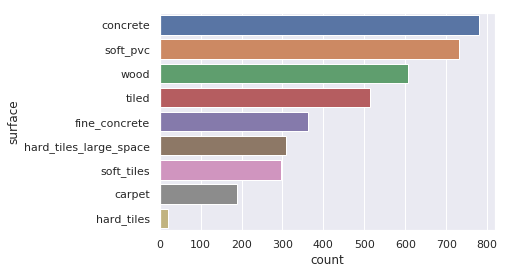

In [30]:
sns.set(style='darkgrid')
sns.countplot(y = 'surface',
              data = y_train,
              order = y_train['surface'].value_counts().index)
plt.show()

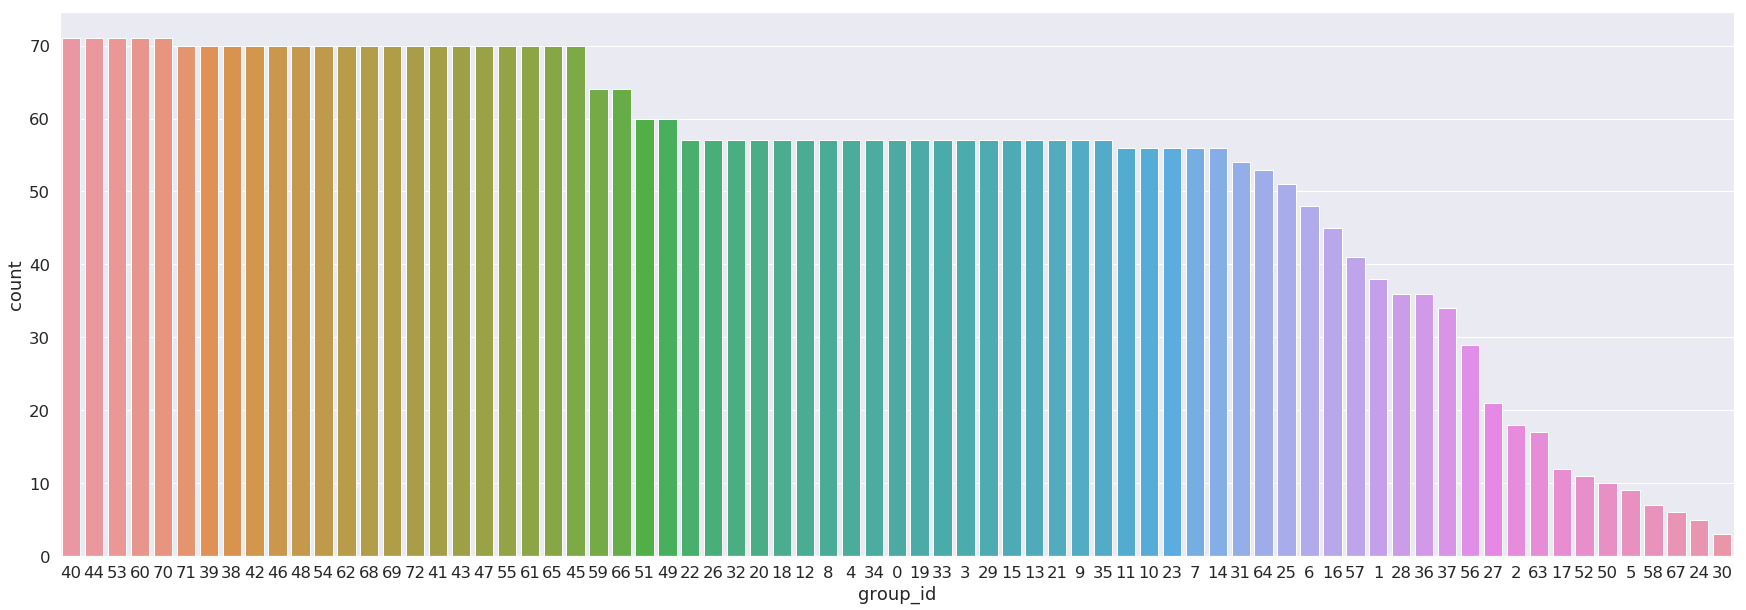

In [39]:
plt.figure(figsize=(30,10)) 
sns.set(style="darkgrid",font_scale=1.5)
sns.countplot(x="group_id", data=y_train, order = y_train['group_id'].value_counts().index)
plt.show()

Next, we want to determine feature correlation in the X train and test sets in order to drop heavily correlated variables, as these will likely overfit the model.

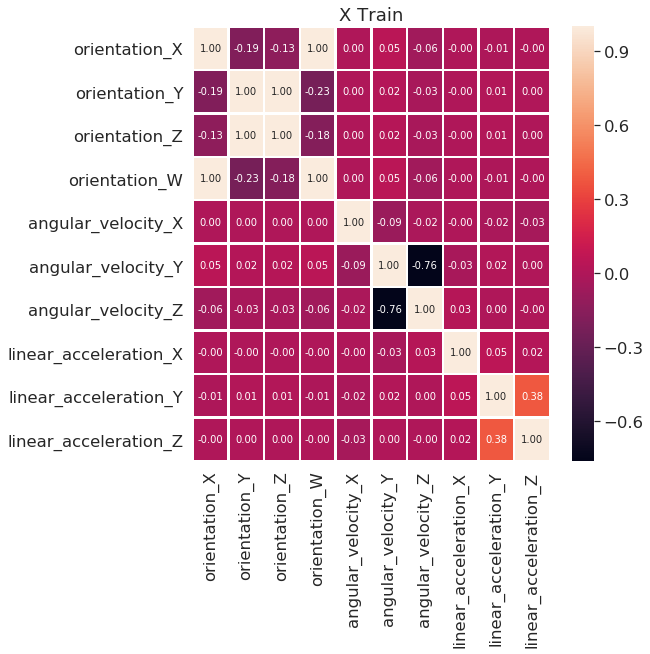

In [51]:
f,ax = plt.subplots(figsize=(8, 8))
plt.title("X Train")
sns.heatmap(x_train.iloc[:,3:].corr(), annot=True, linewidths=1.5, fmt= '.2f', annot_kws={"size": 10}, ax=ax)

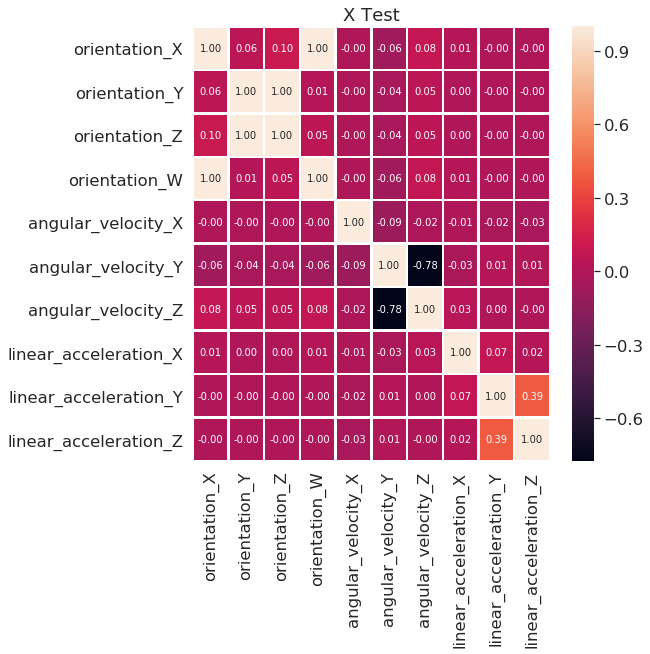

In [50]:
f,ax = plt.subplots(figsize=(8, 8))
plt.title("X Test")
sns.heatmap(x_test.iloc[:,3:].corr(), annot=True, linewidths=1.5, fmt= '.2f', annot_kws={"size": 10}, ax=ax)

From these correlation matrices, we can see that the Y and Z orientations and X and W orientations are perfectly correlated. The angular velocity and linear accelerations in directions Y and Z are each also highly correlated, dropping the features associated with one of these directions may prove beneficial later on.

### Feature Selection

Conduct feature selection on x_train and x_test data for use in model and predictions

In [56]:
train_features = pd.array(y_train.shape)
test_features = pd.array(submission.shape)
time_series_measurements = 128 # Number of time series measurements per surface instance, used to convert between x and y array sizes

First, we saw that the surface classes were very heavily imbalanced, we want to synthetically balance them in the training set using descriptive statistics, though we also still want to generate these statistics for the X test set as well

In [1]:
stats = ['orientation_X', 'orientation_Y', 'orientation_Z', 'orientation_W', 'angular_velocity_X', 'angular_velocity_Y', 'angular_velocity_Z', 'linear_acceleration_X', 'linear_acceleration_Y', 'linear_acceleration_Z', 'mod_quat', 'norm_orientation_X', 'norm_orientation_Y', 'norm_orientation_Z', 'norm_orientation_W', 'euler_X', 'euler_Y', 'euler_Z']
train_features = descriptive_statistics(train_features, x_train, stats)
test_features = descriptive_statistics(test_features, x_test, stats)

Then, we want to convert the quarternion into Euler angles and normalize the parameters (Refer to helper functions file)

In [67]:
x_train = normalize(x_train)
x_train = add_euler_angles(x_train)
x_test = normalize(x_test)
x_test = add_euler_angles(x_test)

Let's visualize the Euler angles for each set of X data:

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, 15)

Now we want to create a series of derivative features based on these existing variables and store them in the feature sets (in order to convert from the number of instances in the raw X datasets to the number of Y instances)

In [ ]:
train_features = descriptive_statistics(train_features, x_train)

## Classification

Run the ensemble, consisting of a Random Forest, Bagging, and SVM classifier

In [14]:
# Voting Ensemble for Classification
seed = 10294817
kfold = model_selection.StratifiedKFold(n_splits=10, random_state=seed)

# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, x, y, cv=kfold)
print(results.mean())

ValueError: Found input variables with inconsistent numbers of samples: [487680, 3810]